<a href="https://colab.research.google.com/github/ChandraMaddikunta/garbage-classification/blob/master/residual_model_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from contextlib import suppress

with suppress(Exception):
  %tensorflow_version 2.x
from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [0]:
from google.colab import drive


drive.mount('/content/drive')
#plt.style.use("seaborn")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
DATASET_DIR = "/content/drive/My Drive/split-garbage-dataset"

X_train = f"{DATASET_DIR}/X_train.npy"
y_train = f"{DATASET_DIR}/y_train.npy"
X_valid = f"{DATASET_DIR}/X_valid.npy"
y_valid = f"{DATASET_DIR}/y_valid.npy"
X_test = f"{DATASET_DIR}/X_test.npy"
y_test = f"{DATASET_DIR}/y_test.npy"

X_train = np.load(X_train)
y_train = np.load(y_train)
X_valid = np.load(X_valid)
y_valid = np.load(y_valid)
X_test = np.load(X_test)
y_test = np.load(y_test)

In [0]:
X_train[0]

array([[[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [201, 185, 170],
        [201, 185, 170],
        [201, 185, 170]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [201, 185, 170],
        [201, 185, 170],
        [201, 185, 170]],

       [[234, 225, 216],
        [234, 225, 216],
        [234, 225, 216],
        ...,
        [201, 185, 170],
        [201, 185, 170],
        [201, 185, 170]],

       ...,

       [[210, 199, 195],
        [210, 199, 195],
        [210, 199, 195],
        ...,
        [147, 133, 107],
        [147, 133, 107],
        [147, 133, 107]],

       [[210, 199, 195],
        [210, 199, 195],
        [210, 199, 195],
        ...,
        [147, 133, 107],
        [147, 133, 107],
        [147, 133, 107]],

       [[210, 199, 195],
        [210, 199, 195],
        [210, 199, 195],
        ...,
        [147, 133, 107],
        [147, 133, 107],
        [147, 133, 107]]

In [0]:
LABELS = ["trash", "plastic", "paper", "metal", "glass", "cardboard"]

LABELS_NUMBERS_MAP = {k:v for k,v in zip(LABELS, range(len(LABELS)))}
LABELS_NUMBERS_REVERSE ={v: k for k, v in LABELS_NUMBERS_MAP.items()}

In [0]:
import numpy as np

In [0]:
# y_train = np.load("y_train.npy")
# y_valid = np.load("y_valid.npy")
# y_test = np.load("y_test.npy")

In [0]:
import matplotlib.pyplot as plt


def plot_images(X, y, grayscale=False, label_num_map=None):
    fig, axes = plt.subplots(1, len(X),  figsize=(20, 10))
    if grayscale:
        X_process = X.reshape(len(X_train), 384, 512) / 255
    else:
        X_process = X

    [ax.imshow(X_process[n]) for n, ax in enumerate(axes)]
    if not label_num_map:
        [ax.set_title((y[n])) for n, ax in enumerate(axes)]
    else:
        [ax.set_title((label_num_map[y[n]])) for n, ax in enumerate(axes)]
    [ax.axis('off') for ax in axes]

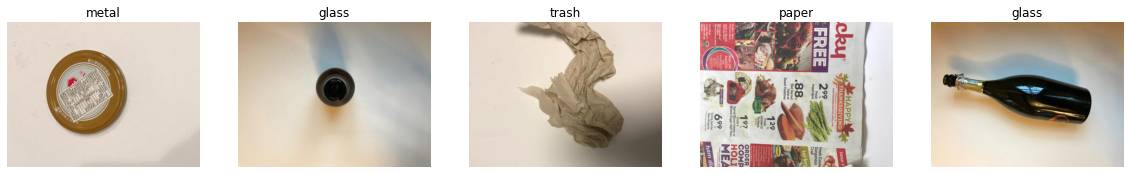

In [0]:
random_indexes = np.random.randint(0, len(X_train), 5)
plot_images(
    X=X_train[random_indexes], 
    y=y_train[random_indexes],
    label_num_map=LABELS_NUMBERS_REVERSE
)

In [0]:
y_train.max()

5

In [0]:
# LABELS_NUMBERS_REVERSE

In [0]:
LABELS_NUMBERS_MAP

{'cardboard': 5, 'glass': 4, 'metal': 3, 'paper': 2, 'plastic': 1, 'trash': 0}

In [0]:
X_test.shape

(431, 384, 512, 3)

In [0]:
X_train.shape

(1768, 384, 512, 3)

In [0]:
y_train_c = keras.utils.to_categorical(y_train, 6)
y_valid_c = keras.utils.to_categorical(y_valid, 6)
y_test_c = keras.utils.to_categorical(y_test, 6)

In [0]:
y_train_c.shape

(1768, 6)

In [0]:
X_train_n = X_train/255
X_test_n = X_test/255
X_valid_n = X_valid/255

In [0]:
from tensorflow import  keras
from keras import layers, Input
from keras.layers import Lambda

Using TensorFlow backend.


In [0]:
inputs = tf.keras.Input(shape=(384, 512, 3))
x = tf.keras.layers.Convolution2D(64, 3, strides = 1,activation='relu', padding='same')(inputs)
x = tf.keras.layers.Convolution2D(128, 3, strides = 1, activation='relu', padding='same')(x)
x3 = tf.keras.layers.MaxPooling2D(pool_size= 2)(x)
#x3 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Convolution2D(128, 3, strides = 1, activation='relu', padding='same')(x3)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Convolution2D(128, 3, strides = 1, activation=None, padding='same')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Lambda(lambda a: a[0] + a[1])([x, x3])
x = tf.keras.layers.Activation('relu')(x)
#x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.layers.MaxPooling2D(pool_size= 2)(x)
#x4 = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.layers.Dense(512,  activation= 'relu')(x)
#x = tf.keras.layers.BatchNormalization()(x)
#x1 = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Convolution2D(256, 3, strides = 1, activation='relu', padding='same')(x)
x4 = tf.keras.layers.MaxPooling2D(pool_size= 2)(x)
#x4 = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Convolution2D(256, 3, strides = 1, activation='relu', padding='same')(x4)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Convolution2D(256, 3, strides = 1, activation=None, padding='same')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Lambda(lambda a: a[0] + a[1])([x, x4])
#x = tf.keras.layers.Add()([x, x1])
x = tf.keras.layers.Activation('relu')(x)
#x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
#x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.layers.MaxPooling2D(pool_size= 2)(x)
#x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.layers.Dense(1024, activation= 'relu')(x)
#x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.MaxPooling2D(pool_size= 2)(x)
#x2 = tf.keras.layers.Dropout(0.2)(x)
##x5 = tf.keras.layers.Convolution2D(256, 3, strides = 1, activation='relu', padding='same')(x)
#x5 = tf.keras.layers.BatchNormalization()(x)
##x = tf.keras.layers.Convolution2D(256, 3, strides = 1, activation=None, padding='same')(x5)
#x = tf.keras.layers.BatchN ormalization()(x)
##x = tf.keras.layers.Lambda(lambda a: a[0] + a[1])([x, x5])
#x = tf.keras.layers.Add()([x, x2])
##x = tf.keras.layers.Activation('relu')(x)
#x = tf.keras.layers.MaxPooling2D(pool_size= 2)(x)
#x = tf.keras.layers.Dropout(0.2)(x) 
#x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048, activation= 'relu')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)                
outputs = tf.keras.layers.Dense(6,activation='softmax')(x)                       
res_net_model = tf.keras.Model(inputs, outputs)

In [0]:
res_net_model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
res_net_model.fit(X_train_n, y_train_c, epochs=50, validation_data=(X_valid_n, y_valid_c))

Train on 1768 samples, validate on 328 samples
Epoch 1/50
1768/1768 [==============================] - 65s 37ms/sample - loss: 1.7055 - acc: 0.2410 - val_loss: 1.5757 - val_acc: 0.3720
Epoch 2/50
1768/1768 [==============================] - 64s 36ms/sample - loss: 1.5270 - acc: 0.3535 - val_loss: 1.5429 - val_acc: 0.3140
Epoch 3/50
1768/1768 [==============================] - 65s 36ms/sample - loss: 1.4912 - acc: 0.3824 - val_loss: 1.5981 - val_acc: 0.3079
Epoch 4/50
1768/1768 [==============================] - 64s 36ms/sample - loss: 1.4903 - acc: 0.3840 - val_loss: 1.5287 - val_acc: 0.3262
Epoch 5/50
1768/1768 [==============================] - 65s 36ms/sample - loss: 1.4575 - acc: 0.3807 - val_loss: 1.4584 - val_acc: 0.4360
Epoch 6/50
1768/1768 [==============================] - 64s 36ms/sample - loss: 1.4093 - acc: 0.4163 - val_loss: 1.5488 - val_acc: 0.3384
Epoch 7/50
1768/1768 [==============================] - 64s 36ms/sample - loss: 1.3330 - acc: 0.4666 - val_loss: 1.4863 - val

In [0]:
+   # from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten
# from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.regularizers import l2

# model = keras.Sequential([
#     keras.layers.Convolution2D(64, 3, strides = 2,  padding= 'same', activation='relu', input_shape=(384, 512, 3)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Convolution2D(64, 3, strides = 2,  padding= 'same',activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size= 2),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.0005)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.2),
#     keras.layers.Convolution2D(128, 3, strides = 2, padding='same', activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Convolution2D(128, 3, strides = 2,  padding= 'same',activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=2),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.0005)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.2),
#     keras.layers.Convolution2D(256, 3, strides = 2, padding='same', activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Convolution2D(256, 3, strides = 2, padding="same", activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D(pool_size=2),
#     keras.layers.Dropout(0.2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(2048, activation='relu', kernel_regularizer=l2(0.0005)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(6,activation='softmax')
#     ])


# model.compile(optimizer='Adam',
#               loss=keras.losses.categorical_crossentropy,
#               metrics=['acc'])

In [0]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# mc = ModelCheckpoint('proejct_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# model.fit(X_train_n, y_train_c, batch_size = 14, epochs=20, validation_data=(X_valid_n, y_valid_c), callbacks=[mc])

In [0]:
test_loss, test_acc = res_net_model.evaluate(X_test_n,  y_test_c, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

431/431 - 5s - loss: 0.7483 - acc: 0.8028

Test accuracy: 0.8027842

Test loss: 0.7483182299164775
